### Classification credit default project

#### Problem statement
Predict whether a loan applicant has a good or bad credit rsik based on the 20 personal and financial variables specific to the applicant. This will help banks in assesing creditworthiness of loan applicants and therefore manage/ reduce the risk associated with defualt 

### Sourcing the data
The data for this project is sourced from the UC Irvine Machine Learning Repository (Url: http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data)  and is based on the German Credit data from Professor Dr. Hans Hofmann,  Institut f"ur Statistik und "Okonometrie, Universit"at Hamburg. It consist of 1000 data instances.  

The data is provided freely and openly UCI and does not contain personally identifying information or sensitive commmercial data.

### 1. Exploring the data

#### 1.1 Import relevant libraries

In [1]:
import numpy as np
#Set command to show graphs in the notebook
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.datasets import make_classification 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from itertools import cycle
np.random.seed(sum(map(ord, "aesthetics"))) 
sn.set_context('notebook') 
sn.set_style(style='darkgrid')

This dataset requires use of a cost matrix (see below) 

..... 1 2 
---------------------------- 
1 0 1 
----------------------- 
2 5 0 

(1 = Good, 2 = Bad) 

The rows represent the actual classification and the columns the predicted classification. 

It is worse to class a customer as good when they are bad (5), than it is to class a customer as bad when they are good (1). 

### Attribute Information:
##### Attribute 1: (qualitative) 
Status of existing checking account - A11 : ... < 0 DM; A12 : 0 <= ... < 200 DM; A13 : ... >= 200 DM / salary assignments for at least 1 year; A14 : no checking account 
##### Attribute 2: (numerical) 
Duration in month 
##### Attribute 3: (qualitative) 
Credit history - A30 : no credits taken/ all credits paid back duly; A31 : all credits at this bank paid back duly; A32 : existing credits paid back duly till now; A33 : delay in paying off in the past; A34 : critical account/ other credits existing (not at this bank) 
##### Attribute 4: (qualitative) 
Purpose - A40 : car (new); A41 : car (used); A42 : furniture/equipment; A43 : radio/television; A44 : domestic appliances; A45 : repairs; A46 : education; A47 : (vacation - does not exist?); A48 : retraining; A49 : business; A410 : others 
##### Attribute 5: (numerical) 
Credit amount 
##### Attibute 6: (qualitative) 
Savings account/bonds - A61 : ... < 100 DM; A62 : 100 <= ... < 500 DM; A63 : 500 <= ... < 1000 DM; A64 : .. >= 1000 DM; A65 : unknown/ no savings account 
##### Attribute 7: (qualitative) 
Present employment since - A71 : unemployed; A72 : ... < 1 year; A73 : 1 <= ... < 4 years; A74 : 4 <= ... < 7 years; A75 : .. >= 7 years 
##### Attribute 8: (numerical) 
Installment rate in percentage of disposable income 
##### Attribute 9: (qualitative) 
Personal status and sex - A91 : male : divorced/separated; A92 : female : divorced/separated/married; A93 : male : single; A94 : male : married/widowed; A95 : female : single 
##### Attribute 10: (qualitative) 
Other debtors / guarantors - A101 : none; A102 : co-applicant; A103 : guarantor 
##### Attribute 11: (numerical) 
Present residence since 
##### Attribute 12: (qualitative) 
Property - A121 : real estate; A122 : if not A121 : building society savings agreement/ life insurance; A123 : if not A121/A122 : car or other, not in attribute 6; A124 : unknown / no property 
##### Attribute 13: (numerical) 
Age in years 
##### Attribute 14: (qualitative) 
Other installment plans -  A141 : bank; A142 : stores; A143 : none 
##### Attribute 15: (qualitative) 
Housing - A151 : rent; A152 : own; A153 : for free 
##### Attribute 16: (numerical) 
Number of existing credits at this bank 
##### Attribute 17: (qualitative) 
Job - A171 : unemployed/ unskilled - non-resident; A172 : unskilled - resident; A173 : skilled employee / official 
A174 : management/ self-employed/highly qualified employee/ officer 
##### Attribute 18: (numerical) 
Number of people being liable to provide maintenance for 
##### Attribute 19: (qualitative) 
Telephone - A191 : none; A192 : yes, registered under the customers name 
##### Attribute 20: (qualitative) 
foreign worker - A201 : yes; A202 : no 

In [2]:
# Column names 
names = ['existingchecking', 'duration', 'credithistory', 'purpose', 'creditamount', 
         'savings', 'employmentsince', 'installmentrate', 'statussex', 'otherdebtors', 
         'residencesince', 'property', 'age', 'otherinstallmentplans', 'housing', 
         'existingcredits', 'job', 'peopleliable', 'telephone', 'foreignworker', 'classification']
Credit_data = pd.read_excel('german.xlsx', names = names, header = None)
print(Credit_data.shape)
print (Credit_data.columns)
Credit_data.sample(10)

(1000, 21)
Index(['existingchecking', 'duration', 'credithistory', 'purpose',
       'creditamount', 'savings', 'employmentsince', 'installmentrate',
       'statussex', 'otherdebtors', 'residencesince', 'property', 'age',
       'otherinstallmentplans', 'housing', 'existingcredits', 'job',
       'peopleliable', 'telephone', 'foreignworker', 'classification'],
      dtype='object')


existingchecking  duration credithistory purpose  creditamount savings  \
875              A12        11           A34     A40          1322     A64   
25               A11         6           A32     A42          1374     A61   
573              A11        15           A32     A49           806     A61   
468              A14        33           A33     A49          2764     A61   
498              A12        18           A32     A43          1301     A61   
56               A12        12           A32     A43          6468     A65   
688              A14         9           A32     A43          2753     A62   
945              A12        48           A30     A40          8358     A63   
43               A11        30           A34     A41          6187     A62   
859              A14         9           A32     A40          3577     A62   

    employmentsince  installmentrate statussex otherdebtors  ...  property  \
875             A73                4       A92         A101  ...      A123   
25              A73                1       A93         A101  ...      A121   
573             A73                4       A92         A101  ...      A122   
468             A73                2       A92         A101  ...      A123   
498             A75                4       A94         A103  ...      A121   
56              A71                2       A93         A101  ...      A124   
688             A75                3       A93         A102  ...      A123   
945             A72                1       A92         A101  ...      A123   
43              A74                1       A94         A101  ...      A123   
859             A73                1       A93         A103  ...      A121   

    age  otherinstallmentplans housing existingcredits   job peopleliable  \
875  40                   A143    A152               2  A173            1   
25   36                   A141    A152               1  A172            1   
573  22                   A143    A152               1  A172            1   
468  26                   A143    A152               2  A173            1   
498  32                   A143    A152               1  A172            1   
56   52                   A143    A152               1  A174            1   
688  35                   A143    A152               1  A173            1   
945  30                   A143    A152               2  A173            1   
43   24                   A143    A151               2  A173            1   
859  26                   A143    A151               1  A173            2   

     telephone foreignworker classification  
875       A191          A201              1  
25        A192          A201              1  
573       A191          A201              1  
468       A192          A201              1  
498       A191          A201              1  
56        A192          A201              2  
688       A192          A201              1  
945       A191          A201              1  
43        A191          A201              1  
859       A191          A202              1  

[10 rows x 21 columns]

Text(0, 0.5, 'Frequency')

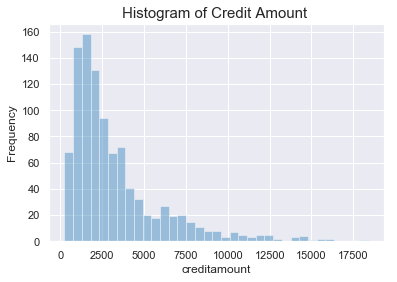

In [3]:
#create histogram for credit amount
sn.distplot(Credit_data.creditamount, kde = False)
plt.title( "Histogram of Credit Amount ", fontsize = 15)
plt.ylabel( "Frequency")

In [4]:
# Binarize the y output for easier use of e.g. ROC curves -> 0 = 'bad' credit; 1 = 'good' credit
Credit_data.classification.replace([1,2], [1,0], inplace=True)
Credit_data.classification.value_counts()

1    700
0    300
Name: classification, dtype: int64

##### URLError: <urlopen error [Errno 11004] getaddrinfo failed>

sn.set(style='darkgrid')
df = sn.load_dataset('Credit_data')
df['classification'].value_counts().plot(kind="bar")
plt.ylabel('Total number of credit holders.')
plt.show()

def annot_plot_num(ax,w,h):                                    # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))
        
def annot_plot(ax,w,h):                                    # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
         ax.annotate(f"{p.get_height() * 100 / df.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, 10),
         textcoords='offset points')

import os

In [5]:
#ax = sn.countplot('classification', data = Credit_data)
#plt.ylabel('Total number of credit holders.')
#annot_plot_num(ax,0.08,1)
#plt.show()

StandardScaler

In [6]:
from sklearn.preprocessing import StandardScaler 
#numerical variables labels
numvars = ['creditamount', 'duration', 'installmentrate', 'residencesince', 'age', 
           'existingcredits', 'peopleliable', 'classification']

# Standardization
numdata_std = pd.DataFrame(StandardScaler().fit_transform(Credit_data[numvars].drop(['classification'], axis=1)))

In [7]:
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder

#categorical variables labels
catvars = ['existingchecking', 'credithistory', 'purpose', 'savings', 'employmentsince',
           'statussex', 'otherdebtors', 'property', 'otherinstallmentplans', 'housing', 'job', 
           'telephone', 'foreignworker']

d = defaultdict(LabelEncoder)

# Encoding the variable
lecatdata = Credit_data[catvars].apply(lambda x: d[x.name].fit_transform(x))

# print transformations
for x in range(len(catvars)):
    print(catvars[x],": ", Credit_data[catvars[x]].unique())
    print(catvars[x],": ", lecatdata[catvars[x]].unique())

#One hot encoding, create dummy variables for every category of every categorical variable
dummyvars = pd.get_dummies(Credit_data[catvars])

existingchecking :  ['A11' 'A12' 'A14' 'A13']
existingchecking :  [0 1 3 2]
credithistory :  ['A34' 'A32' 'A33' 'A30' 'A31']
credithistory :  [4 2 3 0 1]
purpose :  ['A43' 'A46' 'A42' 'A40' 'A41' 'A49' 'A44' 'A45' 'A410' 'A48']
purpose :  [4 7 3 0 1 9 5 6 2 8]
savings :  ['A65' 'A61' 'A63' 'A64' 'A62']
savings :  [4 0 2 3 1]
employmentsince :  ['A75' 'A73' 'A74' 'A71' 'A72']
employmentsince :  [4 2 3 0 1]
statussex :  ['A93' 'A92' 'A91' 'A94']
statussex :  [2 1 0 3]
otherdebtors :  ['A101' 'A103' 'A102']
otherdebtors :  [0 2 1]
property :  ['A121' 'A122' 'A124' 'A123']
property :  [0 1 3 2]
otherinstallmentplans :  ['A143' 'A141' 'A142']
otherinstallmentplans :  [2 0 1]
housing :  ['A152' 'A153' 'A151']
housing :  [1 2 0]
job :  ['A173' 'A172' 'A174' 'A171']
job :  [2 1 3 0]
telephone :  ['A192' 'A191']
telephone :  [1 0]
foreignworker :  ['A201' 'A202']
foreignworker :  [0 1]


In [8]:
CreditData_clean = pd.concat([Credit_data[numvars], dummyvars], axis = 1)

print(CreditData_clean.shape)

(1000, 62)


In [9]:
CreditData_clean.head(3)

creditamount  duration  installmentrate  residencesince  age  \
0          1169         6                4               4   67   
1          5951        48                2               2   22   
2          2096        12                2               3   49   

   existingcredits  peopleliable  classification  existingchecking_A11  \
0                2             1               1                     1   
1                1             1               0                     0   
2                1             2               1                     0   

   existingchecking_A12  ...  housing_A152  housing_A153  job_A171  job_A172  \
0                     0  ...             1             0         0         0   
1                     1  ...             1             0         0         0   
2                     0  ...             1             0         0         1   

   job_A173  job_A174  telephone_A191  telephone_A192  foreignworker_A201  \
0         1         0               0               1                   1   
1         1         0               1               0                   1   
2         0         0               1               0                   1   

   foreignworker_A202  
0                   0  
1                   0  
2                   0  

[3 rows x 62 columns]

Split Training Dataset

In [10]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
# Unscaled, unnormalized data
X_clean = CreditData_clean.drop('classification', axis=1)
y_clean = CreditData_clean['classification']
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean,y_clean,test_size=0.25, random_state=123)

In [11]:
X_train_clean.keys()

Index(['creditamount', 'duration', 'installmentrate', 'residencesince', 'age',
       'existingcredits', 'peopleliable', 'existingchecking_A11',
       'existingchecking_A12', 'existingchecking_A13', 'existingchecking_A14',
       'credithistory_A30', 'credithistory_A31', 'credithistory_A32',
       'credithistory_A33', 'credithistory_A34', 'purpose_A40', 'purpose_A41',
       'purpose_A410', 'purpose_A42', 'purpose_A43', 'purpose_A44',
       'purpose_A45', 'purpose_A46', 'purpose_A48', 'purpose_A49',
       'savings_A61', 'savings_A62', 'savings_A63', 'savings_A64',
       'savings_A65', 'employmentsince_A71', 'employmentsince_A72',
       'employmentsince_A73', 'employmentsince_A74', 'employmentsince_A75',
       'statussex_A91', 'statussex_A92', 'statussex_A93', 'statussex_A94',
       'otherdebtors_A101', 'otherdebtors_A102', 'otherdebtors_A103',
       'property_A121', 'property_A122', 'property_A123', 'property_A124',
       'otherinstallmentplans_A141', 'otherinstallmentplans_A

#See https://markhneedham.com/blog/2017/06/16/scikit-learn-random-forests-feature-importance/

#We'll use this library to make the display pretty
from tabulate import tabulate
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train_clean,y_train_clean)
headers = ["name", "score"]
values = sorted(zip(X_train_clean.columns, model.feature_importances_), key=lambda x: x[1] * -1)
print(tabulate(values, headers, tablefmt="pipe"))

#this is how we get the feature importance with simple steps:
model = RandomForestClassifier()
model.fit(X_train_clean,y_train_clean)
#display the relative importance of each attribute
importances = model.feature_importances_
#Sort it
print ("Sorted Feature Importance:")
sorted_feature_importance = sorted(zip(importances, list(X_train_clean)), reverse=True)
print (sorted_feature_importance)

In [12]:
# Feature importance values from Random Forests
from sklearn.ensemble import RandomForestClassifier
SEED = 999

# Get features list
characteristics = X_clean.columns 

# Train the model
rf = RandomForestClassifier(n_jobs=-1, random_state=SEED)
rf.fit(X_train_clean, y_train_clean)

# Get the variables importances, sort them, and print the result
importances = list(rf.feature_importances_)
characteristics_importances = [(characteristic, round(importance, 3)) for characteristic, importance in zip(characteristics, importances)]
characteristics_importances = sorted(characteristics_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:30} Importance: {}'.format(*pair)) for pair in characteristics_importances];

C:\Users\t514970\AppData\Local\Continuum\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Variable: creditamount                   Importance: 0.104
Variable: duration                       Importance: 0.089
Variable: age                            Importance: 0.075
Variable: existingchecking_A14           Importance: 0.058
Variable: installmentrate                Importance: 0.039
Variable: residencesince                 Importance: 0.033
Variable: existingchecking_A11           Importance: 0.026
Variable: credithistory_A34              Importance: 0.023
Variable: existingcredits                Importance: 0.02
Variable: employmentsince_A73            Importance: 0.019
Variable: otherinstallmentplans_A143     Importance: 0.019
Variable: telephone_A192                 Importance: 0.019
Variable: statussex_A92                  Importance: 0.018
Variable: telephone_A191                 Importance: 0.018
Variable: savings_A61                    Importance: 0.017
Variable: statussex_A93                  Importance: 0.017
Variable: purpose_A40                    Importance: 0.01

#https://www.datacareer.co.uk/blog/random-forest-in-python-with-scikit-learn/

from sklearn.ensemble import RandomForestRegressor

#Get features list
characteristics = X_clean.columns

#Train the model
regr = RandomForestRegressor(n_estimators = 500, max_depth = 10, random_state = 123)
regr.fit(X_train_clean, y_train_clean.values.ravel())

#Get the variables importances, sort them, and print the result
importances = list(regr.feature_importances_)
characteristics_importances = [(characteristic, round(importance, 3)) for characteristic, importance in zip(characteristics, importances)]
characteristics_importances = sorted(characteristics_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in characteristics_importances];

#Visualize the variables importances

plt.figure(figsize=(20,10))
plt.bar(characteristics, importances, orientation ='vertical')
plt.xticks(rotation = 'vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.grid(axis = 'y', color = '#D3D3D3', linestyle = 'solid')
plt.title('Features of importance')
plt.show()

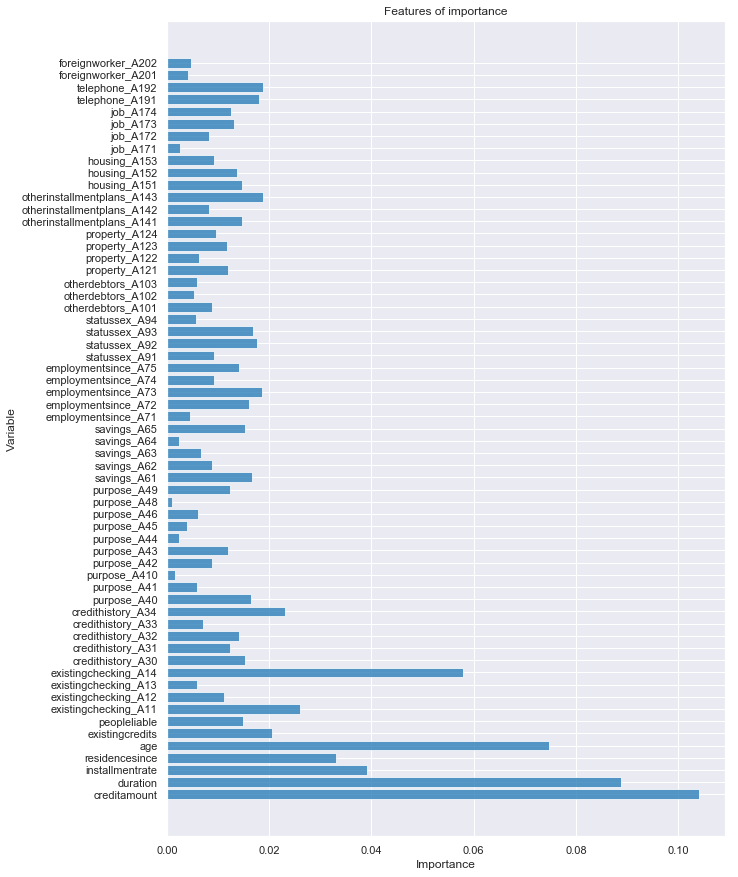

In [13]:
# Visualize the variables importances
plt.figure(figsize=(10,15))
y_pos = np.arange(len(characteristics))

# Create horizontal bars 
plt.barh(y_pos, importances, alpha=0.75)
# Create names on the y-axis 
plt.yticks(y_pos, characteristics) 
# label 
plt.ylabel('Variable')
plt.xlabel('Importance')

plt.title('Features of importance')
# Show graphic 
plt.show() 

### Random Forest Classifier.
Let's choose the best estimator and parameters :GridSearchCV

In [14]:
#let's check what params will be best suitable for random forest classification.
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

rfc_clf = RandomForestClassifier()
params = {'n_estimators':[25,50,100,150,200,500],'max_depth':[0.5,1,5,10],'random_state':[1,10,20,42],
          'n_jobs':[1,2]}
grid_search_cv = GridSearchCV(rfc_clf, params, scoring='precision')
grid_search_cv.fit(X_train_clean, y_train_clean)

C:\Users\t514970\AppData\Local\Continuum\Miniconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
           

In [15]:
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_params_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)
{'max_depth': 10, 'n_estimators': 25, 'n_jobs': 1, 'random_state': 1}


Accuracy: 0.724
Confusion Matrix: [ 27  14  55 154]
Classification report:
              precision    recall  f1-score   support

           0       0.33      0.66      0.44        41
           1       0.92      0.74      0.82       209

    accuracy                           0.72       250
   macro avg       0.62      0.70      0.63       250
weighted avg       0.82      0.72      0.75       250

cross val score: 0.7519824561403509


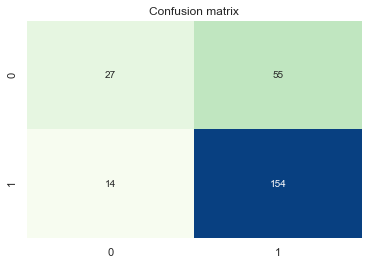

In [16]:
rfc_clf = grid_search_cv.best_estimator_
rfc_clf.fit(X_train_clean,y_train_clean)
rfc_clf_pred = rfc_clf.predict(X_test_clean)
print('Accuracy:',accuracy_score(rfc_clf_pred,y_test_clean) )
print('Confusion Matrix:', confusion_matrix(rfc_clf_pred,y_test_clean).ravel()) #tn,fp,fn,tp
print('Classification report:')
print(classification_report(rfc_clf_pred,y_test_clean))

# Let's make sure the data is not overfitting
score_rfc = cross_val_score(rfc_clf,X_train_clean,y_train_clean,cv = 10).mean()
print('cross val score:', score_rfc)

cm = confusion_matrix(y_test_clean, rfc_clf_pred)
plt.title('Confusion matrix')
sn.heatmap(cm, fmt='d', cmap='GnBu', cbar=False, annot=True)

### SupportVectorClassifier

##### SVC code not used 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
#Implement gridsearchcv to see which are our best p

params = {'C': [0.75, 0.85, 0.95, 1], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
          'degree': [3, 4, 5]}

svc_clf = SVC(random_state=42)
grid_search_cv = GridSearchCV(svc_clf, params)
grid_search_cv.fit(X_train_clean, y_train_clean)

#### SVC code not used 
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_params_)

#### SVC code not used 
svc_clf = grid_search_cv.best_estimator_
svc_clf.fit(X_train_clean,y_train_clean)
svc_pred = svc_clf.predict(X_test_clean)

print('Accuracy:',accuracy_score(svc_pred,y_test_clean) )
print('Confusion Matrix:', confusion_matrix(svc_pred,y_test_clean,labels=[0,1])) #tn,fp,fn,tp
print('Classification report:')
print(classification_report(svc_pred,y_test_clean))

#Let's make sure the data is not overfitting
score_svc = cross_val_score(svc_clf,X_train_clean,y_train_clean, cv = 10).mean()
print('cross val score:', score_svc)

### Gradient Boosting: Classifier

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train_clean,y_train_clean)
gbc_pred = gbc.predict(X_test_clean)

print('Accuracy:',accuracy_score(gbc_pred,y_test_clean) )
print('Confusion Matrix:', confusion_matrix(gbc_pred,y_test_clean,labels=[0,1])) #tn,fp,fn,tp
print('Classification report:')
print(classification_report(gbc_pred,y_test_clean))

# Let's make sure the data is not overfitting
score_gbc = cross_val_score(gbc,X_train_clean,y_train_clean, scoring='accuracy', cv = 10).mean()
print('cross val score:', score_gbc)

cm = confusion_matrix(y_test_clean, gbc_pred)
plt.title('Confusion matrix')
sn.heatmap(cm, fmt='d', cmap='GnBu', cbar=False, annot=True)

Accuracy: 0.76
Confusion Matrix: [[ 41  19]
 [ 41 149]]
Classification report:
              precision    recall  f1-score   support

           0       0.50      0.68      0.58        60
           1       0.89      0.78      0.83       190

    accuracy                           0.76       250
   macro avg       0.69      0.73      0.70       250
weighted avg       0.79      0.76      0.77       250

cross val score: 0.748072072072072


### LogisticRegression

In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_clean,y_train_clean)
lr_pred = lr.predict(X_test_clean)

print('Accuracy:',accuracy_score(lr_pred,y_test_clean) )
print('Confusion Matrix:', confusion_matrix(lr_pred,y_test_clean,labels=[0,1])) #tn,fp,fn,tp
print('Classification report:')
print(classification_report(lr_pred,y_test_clean))

# Let's make sure the data is not overfitting
score_lr = cross_val_score(lr,X_train_clean,y_train_clean,cv=10).mean()
print('cross val score:', score_lr)

cm = confusion_matrix(y_test_clean, lr_pred)
plt.title('Confusion matrix')
sn.heatmap(cm, fmt='d', cmap='GnBu', cbar=False, annot=True)

C:\Users\t514970\AppData\Local\Continuum\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\t514970\AppData\Local\Continuum\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\t514970\AppData\Local\Continuum\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\t514970\AppData\Local\Continuum\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\t514970\AppData\Local\Continuum\Miniconda3\lib\site-package

Accuracy: 0.74
Confusion Matrix: [[ 42  25]
 [ 40 143]]
Classification report:
              precision    recall  f1-score   support

           0       0.51      0.63      0.56        67
           1       0.85      0.78      0.81       183

    accuracy                           0.74       250
   macro avg       0.68      0.70      0.69       250
weighted avg       0.76      0.74      0.75       250

cross val score: 0.74526173541963


C:\Users\t514970\AppData\Local\Continuum\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\t514970\AppData\Local\Continuum\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\t514970\AppData\Local\Continuum\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\t514970\AppData\Local\Continuum\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [19]:
models = pd.DataFrame({'Models':['Random Forest Classifier','Logistic Regression', 
                                 'Gradient Boost Classifier'],
                      'Score':[score_rfc,score_lr,score_gbc]})
models.sort_values(by='Score', ascending = False)

Models     Score
0   Random Forest Classifier  0.751982
2  Gradient Boost Classifier  0.748072
1        Logistic Regression  0.745262

### Accuracy is measured by the area under the ROC curve. An area of 1 represents a perfect test; an area of .5 represents a worthless test.

A rough guide for classifying the accuracy of a diagnostic test is the traditional academic point system:**

.90-1 = excellent (A)

.80-.90 = good (B)

.70-.80 = fair (C)

.60-.70 = poor (D)

.50-.60 = fail (F)

### ROC and AUC curve:
ROC - ROC make it easy to identify the best threshold for making a decision.
AUC - AUC help us to decide which categorization method is better.

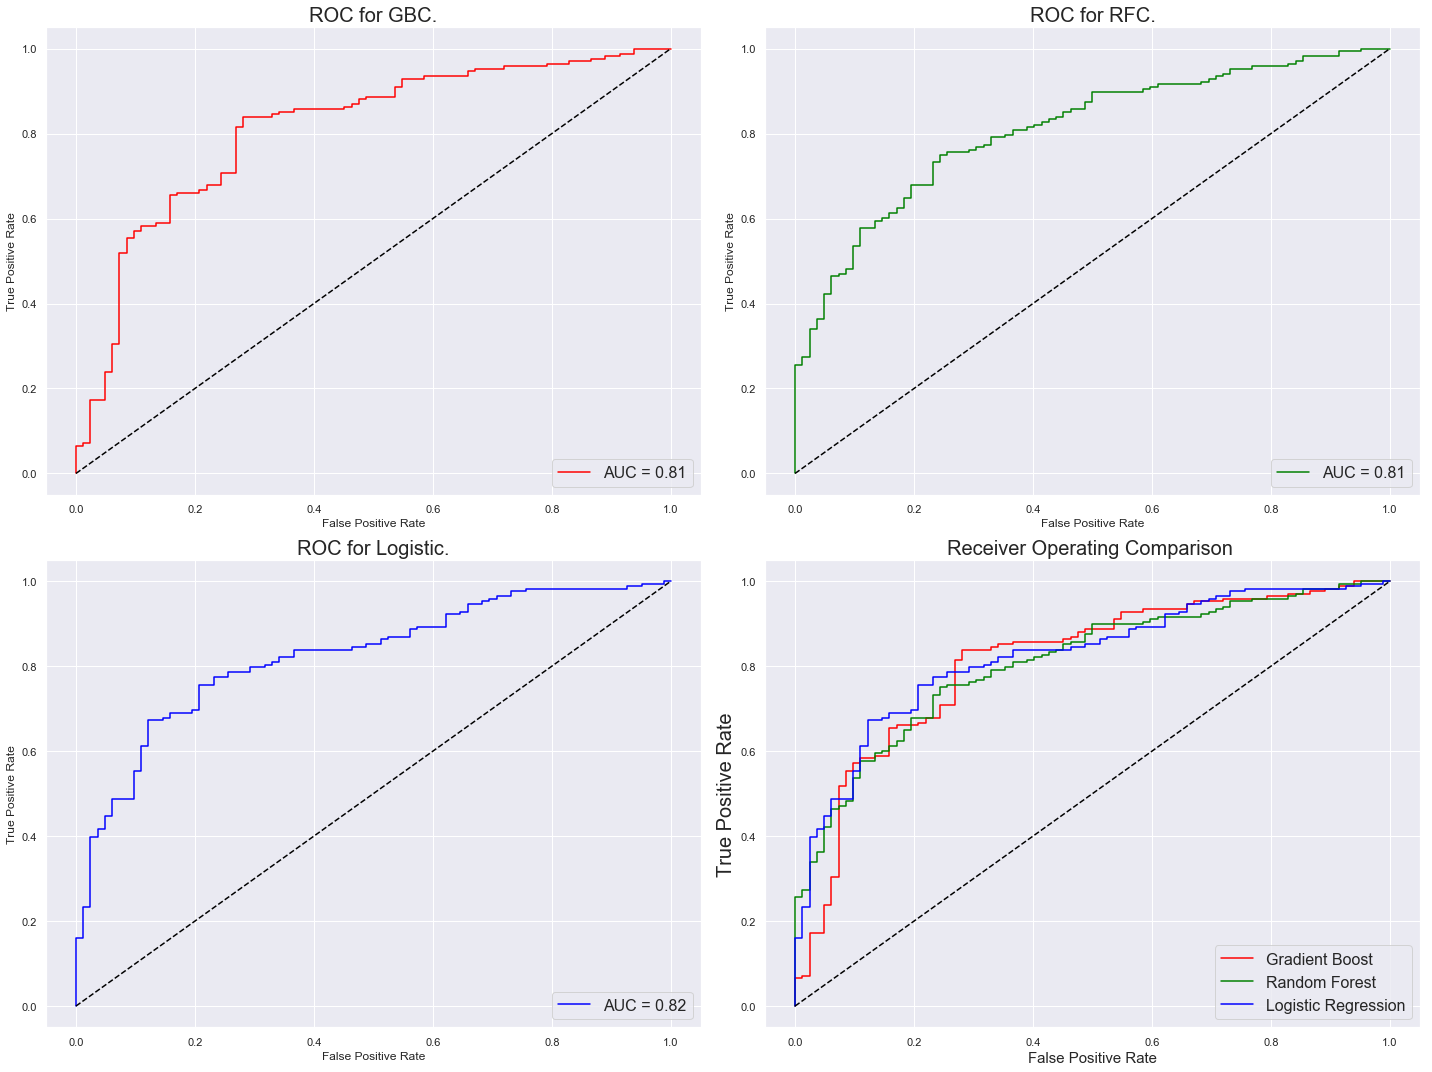

In [20]:
fig, ax_arr = plt.subplots(nrows = 2, ncols = 2, figsize = (20,15))

from sklearn import metrics

#Random forest
rfc_prob = rfc_clf.predict_proba(X_test_clean)[:,1]
fprRfc, tprRfc, thresholdsRfc = metrics.roc_curve(y_test_clean, rfc_prob)
roc_auc_rfc = metrics.auc(fprRfc,tprRfc)
ax_arr[0,1].plot(fprRfc, tprRfc,'b',label = 'AUC = %0.2f' % roc_auc_rfc,color = 'green')
ax_arr[0,1].plot([0, 1], [0, 1], 'k--')
ax_arr[0,1].set_xlabel('False Positive Rate')
ax_arr[0,1].set_ylabel('True Positive Rate')
ax_arr[0,1].set_title('ROC for RFC.', fontsize = 20)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})


#Logistic Regression
lr_prob = lr.predict_proba(X_test_clean)[:,1]
fprLr, tprLr, thresholdsLr = metrics.roc_curve(y_test_clean, lr_prob)
roc_auc_lr = metrics.auc(fprLr,tprLr)
ax_arr[1,0].plot(fprLr, tprLr,'b',label = 'AUC = %0.2f' % roc_auc_lr,color = 'blue')
ax_arr[1,0].plot([0, 1], [0, 1], 'k--')
ax_arr[1,0].set_xlabel('False Positive Rate')
ax_arr[1,0].set_ylabel('True Positive Rate')
ax_arr[1,0].set_title('ROC for Logistic.', fontsize = 20)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})


#gbc
gbc_prob = gbc.predict_proba(X_test_clean)[:,1]
fprgbc, tprgbc, thresholdsgbc = metrics.roc_curve(y_test_clean, gbc_prob)
roc_auc_gbc = metrics.auc(fprgbc,tprgbc)
ax_arr[0,0].plot(fprgbc, tprgbc,'b',label = 'AUC = %0.2f' % roc_auc_gbc,color = 'red')
ax_arr[0,0].plot([0, 1], [0, 1], 'k--')
ax_arr[0,0].set_xlabel('False Positive Rate')
ax_arr[0,0].set_ylabel('True Positive Rate')
ax_arr[0,0].set_title('ROC for GBC.', fontsize = 20)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})


#For All
ax_arr[1,1].plot(fprgbc,tprgbc, label ='Gradient Boost', color = 'red')
ax_arr[1,1].plot(fprRfc,tprRfc, label ='Random Forest', color = 'green')
ax_arr[1,1].plot(fprLr,tprLr, label ='Logistic Regression', color = 'blue')
ax_arr[1,1].plot([0, 1], [0, 1], 'k--')
ax_arr[1,1].set_title('Receiver Operating Comparison ',fontsize=20)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 
plt.show()

### ANALYZING THE RESULTS
So now we have to decide which one is the best model, and we have two types of wrong values:

False Positive, means they won't pay the loan(Risk:Yes), but the model thinks they will.
False Negative, means they will pay the loan(Risk:No), but the model said they won't.
In my opinion:

Length of the dataset isn't enough, we need more data for better accuracy.